<a href="https://colab.research.google.com/github/VR952004/DataAnalysisProjects/blob/main/TitanicAccidentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

link=f'/content/drive/MyDrive/csv files/train.csv'
df=pd.read_csv(link)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(columns=['Cabin','Ticket','Name'],axis=1,inplace=True)

Dataframes consist of two axes, rows and columns. Rows are referred with the number 0 while columns are referred with the number 1. In this case we want to apply the drop() fuction on the columns, we used "axis=1".

"inplace=True" is used to apply the changes made by the drop() function onto the dataframe.

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

We wish to fill in null values wherever possible, but we can replace null values with the mean,mode or standard deviation if the data is numeric. But for categorical data such as the location at which the passenger embarked on the ship, we cannot replace it with any random value. Fortunately, there are only 2 rows which have a null value for the "Embarked" column we can drop these rows using the following method.

In [ ]:
df.dropna(subset=['Embarked'],inplace=True)

Explaination of the above used function and the parameters inside it:

1) dropna() is a function used to drop rows which have null values aka NaN.

2) The parameter "subset" is used to select the column for which the dropna() function is to be applied on.

3) The parameter "inplace=True" is used to apply the changes made by the dropna() function onto the dataframe.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

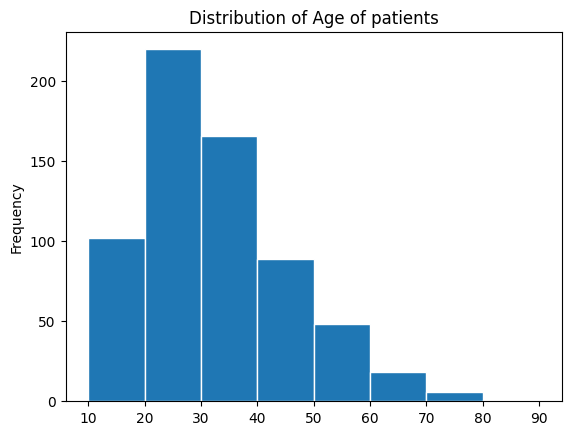

In [ ]:
vis1=df.query('Age > 0')["Age"]

bins=[10,20,30,40,50,60,70,80,90]

vis1.plot(
    kind="hist", bins=bins, title="Distribution of Age of patients", edgecolor='white'
)
plt.show()

Now for handling the null values in the age column. Online sources say the usage of the following mathematical value of replacing null values depending on the situation:

1) Mean - It is used when the data is normally distributed.

2) Median - It is to be used when the data comprises of outliers.(Outliers are values that are either very large or significantly smaller than all the other values in the data set, these tend to disrupt the conclusions that are drawn from a data and must be removed to get the desired inference.)

3) Mode - It is used when there is a frequent use of a value in the dataset.

In this case, since the data is neither normally distributed nor does it have outliers, we could replace the null values with the mode.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

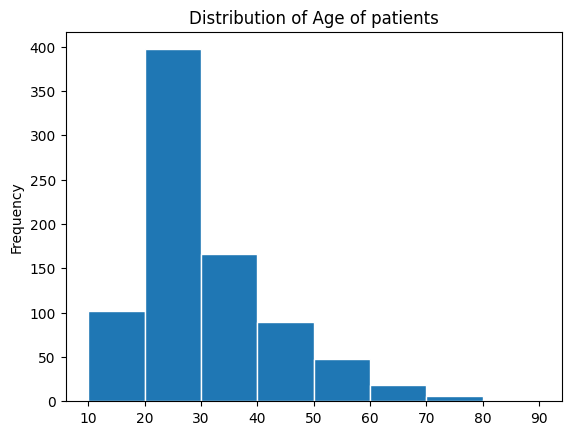

In [ ]:
vis2=df.query('Age > 0')["Age"]

bins=[10,20,30,40,50,60,70,80,90]

vis2.plot(
    kind="hist", bins=bins, title="Distribution of Age of patients", edgecolor='white'
)
plt.show()

In [ ]:
df['Age'].describe()

count    889.000000
mean      28.518751
std       13.162820
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

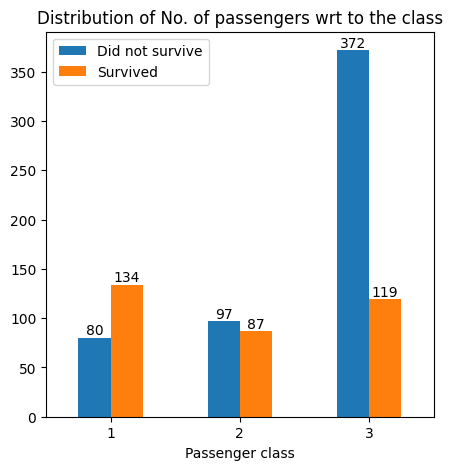

In [ ]:
np_vs_class= df.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',title='Distribution of No. of passengers wrt to the class',figsize=(5,5))
plt.xlabel('Passenger class')
plt.legend(['Did not survive', 'Survived'], loc='upper left')
plt.xticks(rotation=0)

for i in np_vs_class.patches:
    np_vs_class.text(i.get_x() + i.get_width() / 2, i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

plt.show()

The following are the descriptions of the methods used:

1) size() : It counts the number of occurrences in each group.It returns a series where the index contains the group keys and the values represent the size of each group.

2) unstack() : It reshapes the data from a multi-indexed series into a data frame.

3) plot() : It is a matplotlib function used to plot a graph. The following are the explaination of the parameters passed within this function.


*   kind : It is used to define the type of graph to be plotted. In this case we want a bar chart so we wrote bar.
*   title : It is used to give a suitable title to the graph.
*   figsize : It is used to define the size of the figure of the plot.





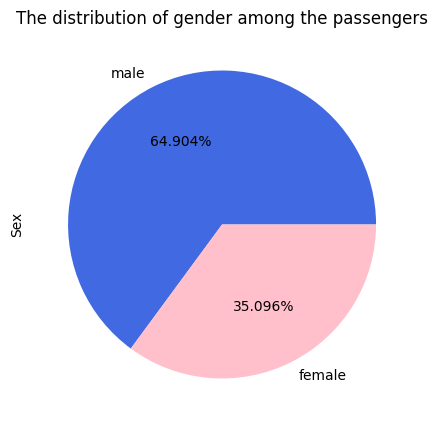

In [ ]:
df['Sex'].value_counts().plot(kind='pie',title='The distribution of gender among the passengers',figsize=(5,5),colors=['royalblue','pink'],autopct='%0.3f%%')
plt.show()

Explaination of the parameters in the plot() funtion:



*   kind='pie' : Used to plot a pie chart.
*   colors : It is used to set colors for the different parts of the pie chart.
*   autopct : It is used to generate labels in the pie chart. The string "%0.3f%%" is used to display the value of the percentage with 3 decimal places.



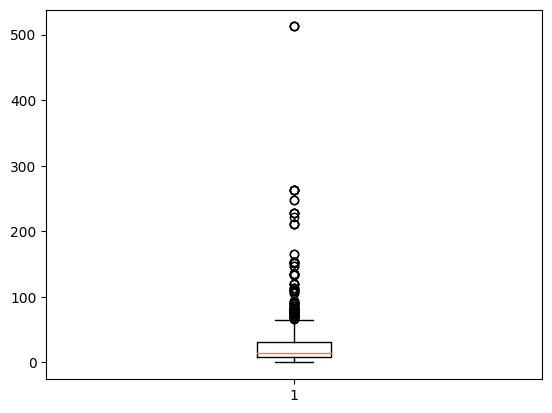

In [ ]:
plt.boxplot(df['Fare'])
plt.show()

In [ ]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Box plot is used for describing the data in the dataset. It displays the outliers, minimum and maximum values in the dataset. It also gives us the median, lower and upper quartile as well as interquartile range.Here are the meaning of the various parts in the box plot:


*   The Dots (o) : They signifiy the outliers in the data. Outliers can be understood as very large values or significantly smaller values that can disrupt the inference we make from the dataset. They must be dealt with so as to obtain the correct result from the data.
*   Upper small line : This shows the maximum value in the data set aside from the outliers.
*   Lower small line : This shows the minimum value in the data set aside from the outliers.
*   The rectangle : The length of the rectangle is equal to the inter-quatile range.
*   Upper edge of the rectangle : It indicates the value of the upper quartile.
*   Lower edge of the rectangle : It indicates the value of the lower quartile.
*   The line inside the rectangle : It indicates the value of the median of the data.
*   Vertical lines : It is called the whiskers.

In [ ]:
df_agg=df.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack()*100
df_agg

Embarked,C,Q,S
Pclass,,,
1,39.719626,0.934579,59.345794
2,9.239130,1.630435,89.130435
3,13.441955,14.663951,71.894094


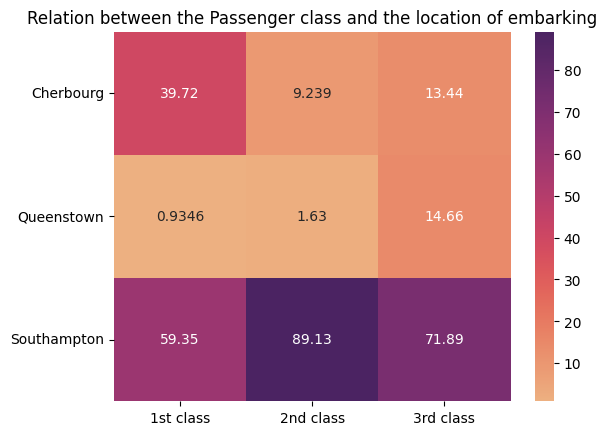

In [ ]:
Index=['Cherbourg','Queenstown','Southampton']
df1=pd.DataFrame({'1st class':[39.719626,0.934579,59.345794],'2nd class':[9.239130,1.630435,89.130435],'3rd class':[13.441955,14.663951,71.894094]},index=Index)

sns.heatmap(df1,annot=True,cmap='flare',fmt='.4g')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Relation between the Passenger class and the location of embarking")

plt.show()

Heatmap is a visualization tool that is used to correlate variables in a dataset. We can understand the correlation between the variables based on the hues of the colors that are depicted by the heatmap. Following are the important concepts used in the making of a heatmap:

1)   First we use made a smaller data frame or a part of the existing dataframe which consists of the variables that are to be correlated.

2)   We  use the seaborn library to make a better designed heatmaps. So we get a better understanding of the correlation.We use the heatmap() function to make the heatmap.

3)    The parameters in the heatmap function mean the following :


*   We pass either a data frame or variables from the dataset that are to be correlated.
*   "annot=True" is used to enable the annotions (i.e. the numbers showing the correlation between the variables)
*   cmap is used to set the colors of the heatmap. There are predefined gradients in the seaborn library that are to be used for the representation of the heatmap.
*   fmt is a string formatting code used when adding annotations to the heatmap.

4) plt.xticks() stands for the labels on the x-axis the parameter "rotation=0" implies that the rotation of text wrt the x-axis is 0.

5) plt.yticks() stands for the labels on the y-axis the parameter "rotation=0" implies that the rotation of text wrt the x-axis is 0.



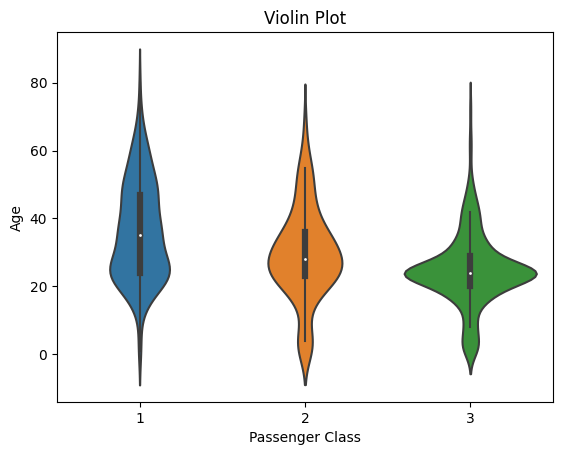

In [ ]:
sns.violinplot(x=df['Pclass'],y=df['Age'])

plt.title("Violin Plot")
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

Interepreting the violin plot.The following are the meanings of each of the indications in the plot :-


*   The white dot marks the median of the data.
*   The thicker grey line in the centre represents the interquartile range.
*   The thiner grey line in the centre represents the rest of the distribution other than the outliers.
*   The outer curve estimates the kernel density of the data. Wider sections represent higher probability than the skinner sections.


The parameters in the violinplot() function defines the axes.Here we set the passenger class to the x-axis and the age to the y-axis.

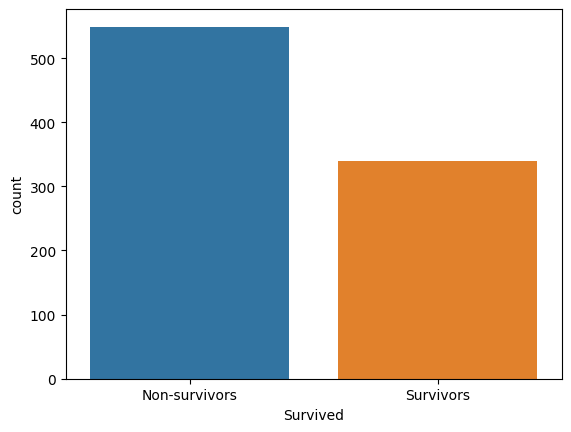

In [ ]:
sns.countplot(x=df['Survived'].map({0: 'Non-survivors', 1: 'Survivors'}))
plt.show()

In [ ]:
df_agg=df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()*100
df_agg

Survived,0,1
Pclass,,
1,37.383178,62.616822
2,52.717391,47.282609
3,75.763747,24.236253


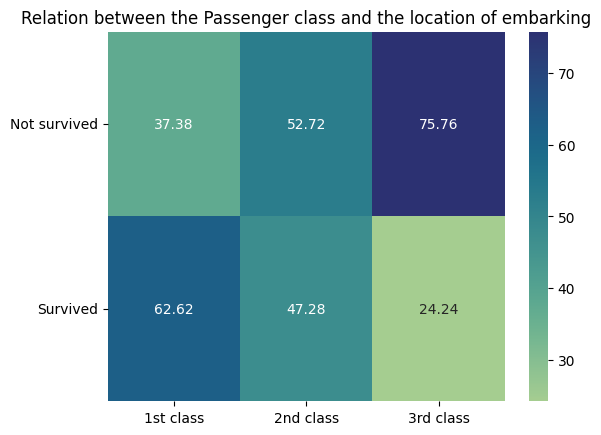

In [ ]:
Index=['Not survived','Survived']
df2=pd.DataFrame({'1st class':[37.383178,62.616822],'2nd class':[52.717391,47.282609],'3rd class':[75.763747,24.236253]},index=Index)

sns.heatmap(df2,annot=True,cmap='crest',fmt='.4g')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Relation between the Passenger class and the location of embarking")

plt.show()

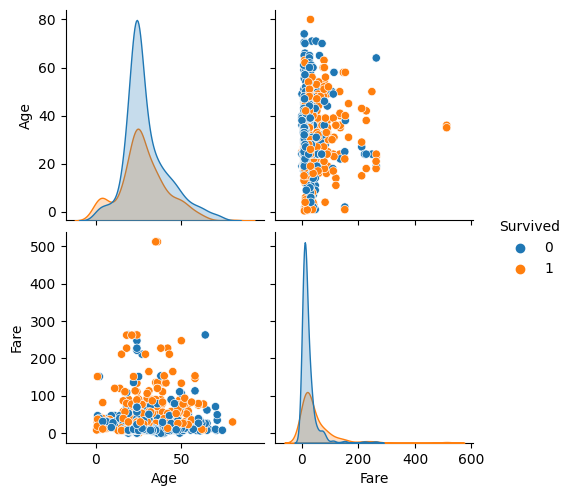

In [ ]:
#relation between age and fare

sns.pairplot(df,hue='Survived',vars=['Age','Fare'])
plt.show()

Answering the given questions,



1.    From the bar plot showing the relation between the no. of passenger and the class, we can see that majority of the passengers opted for 3rd passenger class. Surprisingly, we get to see that there are more passengers travelling in the 1st class than in the 2nd class.Linking this to the political and economical background of England during the same time period.

  We know that England was expanding it's colonies and so the passengers that boarded the ship were either from the working class that were required in their colonies in America (i.e. the passengers travelling in 3rd class) or wealthy nobles that were appointed official duty in administrating the colonies ( i.e. the passengers travelling in 1st class). We could say that the passengers travelling in the 2nd class were middle class tourists on their way to visiting America (thereby explaining the lesser count of 2nd class passengers).  
2.    From the histogram of the age distribution of the passengers we can say that majority of the passengers were aged between 20 years and 30 years. But, even the age groups of 10 to 20 and 30 to 40 age groups have significant passengers.

3.    From the pie plot we can infere that there is a majority of male passengers than female passengers.

4.    The fare increases with the difference in class but majority of the fare costed less than or equal to 120 pounds with a few tickets costing more than 120 pounds.

5.    In this dataframe the numerical features are the passenger class,age and fare. The Survived column is is not actually a numerical feature since it is actually categorical signifying if the passenger survived or not. We can see the following relations between these numerical features:
    
    * Pclass and Age : We can see that the 2nd class is used by greater range of ages. Whereas, 1st class is mainly used by ages from 10 to 70 and 3rd class is used by the age group of 0 to 50.

    * Age and Fare : The fares of the ticket increases from 3rd class to 1st class but there isn't a distinct relation between the age of the passenger and the fare of the ticket.

    * Pclass and Fare : The fares of the ticket increases from the 3rd class to the 1st class.

6.   We can deduce a relation between the age of a passenger and the passenger class from the above plotted violin plot. The following are the observations for the same:
      *   In 1st class we see that majority of the passengers are in the age group of 10 to 70. The younger passengers can be characterised as the children of the elite passengers or wealthy nobles.
      *   In 2nd class the we see that the passengers are distributed over 0 years to 70ish years. This comprises of the middle class passengers who are well to do in life but not nobility.
      *   Finally in the 3rd class the age is distributed over 0 to 50 years.
7.  From the above grouped bar chart we can see the following:
      *   1st class: The number of people survived are more than the people who didn't survive.
      *   2nd class: The number of people that survived are lesser than the people that didn't survive. But the difference in the number of non-survivers and survivers is small.
      *   3nd class: The number of people that survived are lesser than the people that didn't survive. But the difference in the number of non-survivers and survivers is large.

8.  No, I do not see anymore relationships between the numerical features of the data set.




